In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import keras.layers as layers
import os
import matplotlib.pyplot as plt
import glob
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Scalograms.zip -d /content/Data

Archive:  /content/drive/MyDrive/Scalograms.zip
  inflating: /content/Data/Neural Project/MATLAB Drive/Scalograms/ARR/ARR_1.jpg  
  inflating: /content/Data/Neural Project/MATLAB Drive/Scalograms/ARR/ARR_10.jpg  
  inflating: /content/Data/Neural Project/MATLAB Drive/Scalograms/ARR/ARR_11.jpg  
  inflating: /content/Data/Neural Project/MATLAB Drive/Scalograms/ARR/ARR_12.jpg  
  inflating: /content/Data/Neural Project/MATLAB Drive/Scalograms/ARR/ARR_13.jpg  
  inflating: /content/Data/Neural Project/MATLAB Drive/Scalograms/ARR/ARR_14.jpg  
  inflating: /content/Data/Neural Project/MATLAB Drive/Scalograms/ARR/ARR_15.jpg  
  inflating: /content/Data/Neural Project/MATLAB Drive/Scalograms/ARR/ARR_16.jpg  
  inflating: /content/Data/Neural Project/MATLAB Drive/Scalograms/ARR/ARR_17.jpg  
  inflating: /content/Data/Neural Project/MATLAB Drive/Scalograms/ARR/ARR_18.jpg  
  inflating: /content/Data/Neural Project/MATLAB Drive/Scalograms/ARR/ARR_19.jpg  
  inflating: /content/Data/Neural Projec

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split = 0.2
        )


train_generator = train_datagen.flow_from_directory(
        '/content/Data/Neural Project/MATLAB Drive/Scalograms',
        target_size=(512, 512),
        batch_size=4,
        class_mode='categorical',
        subset = 'training',
        color_mode = 'rgb'
        )

val_generator = train_datagen.flow_from_directory(
        '/content/Data/Neural Project/MATLAB Drive/Scalograms',
        target_size=(512, 512),
        batch_size=4,
        class_mode='categorical',
        subset = 'validation',
        color_mode = 'rgb'
        )



Found 130 images belonging to 3 classes.
Found 32 images belonging to 3 classes.


In [ ]:
preprocess = keras.applications.resnet.preprocess_input
resnet_head = keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(512,512,3)
)
resnet_head.trainable = False

94765736/94765736 [==============================] - 6s 0us/step


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
inp = keras.Input(shape = (512,512,3),dtype = tf.float64)
x = preprocess(inp)
x = resnet_head(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(3,activation = 'softmax')(x)
model = keras.Model(inp,x)
model.compile(optimizer = 'sgd',
              loss = 'categorical_crossentropy',
              metrics = ['categorical_accuracy']
            )

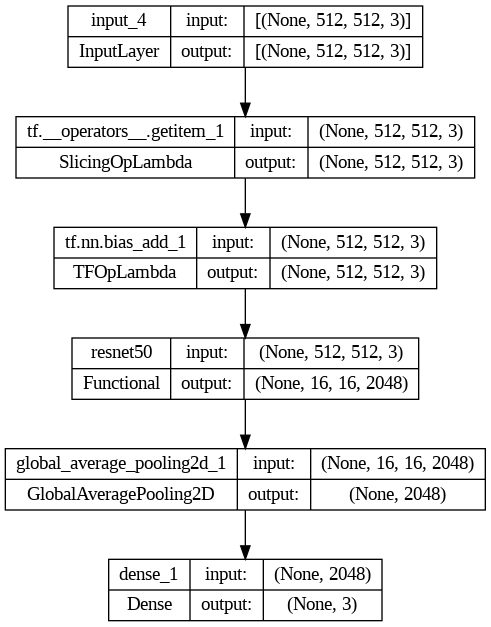

In [ ]:
keras.utils.plot_model(model,show_shapes = True)

In [ ]:
model.fit(
        train_generator,
        #steps_per_epoch=2000,
        epochs=50,
        validation_data=val_generator,
        #validation_steps=800
        )

Epoch 1/50
33/33 [==============================] - 15s 368ms/step - loss: 6.8201 - categorical_accuracy: 0.4923 - val_loss: 8.3418 - val_categorical_accuracy: 0.2188
Epoch 2/50
33/33 [==============================] - 11s 320ms/step - loss: 7.9989 - categorical_accuracy: 0.4308 - val_loss: 12.1902 - val_categorical_accuracy: 0.2188
Epoch 3/50
33/33 [==============================] - 11s 322ms/step - loss: 7.0044 - categorical_accuracy: 0.4769 - val_loss: 15.7069 - val_categorical_accuracy: 0.1875
Epoch 4/50
33/33 [==============================] - 9s 276ms/step - loss: 9.1366 - categorical_accuracy: 0.3692 - val_loss: 9.1702 - val_categorical_accuracy: 0.5938
Epoch 5/50
33/33 [==============================] - 10s 312ms/step - loss: 8.1401 - categorical_accuracy: 0.4615 - val_loss: 2.8416 - val_categorical_accuracy: 0.5938
Epoch 6/50
33/33 [==============================] - 10s 317ms/step - loss: 7.8332 - categorical_accuracy: 0.4615 - val_loss: 4.7680 - val_categorical_accuracy: 0.21

In [ ]:
model.save_weights('/content/drive/MyDrive/datasets/only_weights.h5')

In [ ]:
model.save('/content/drive/MyDrive/datasets/model_everything/')